# Random Forest Classifier Training

This notebook trains a RandomForest model on the Pima Indians Diabetes Dataset, to use in comparisons against the QML models when applying explainability techniques.

### Imports

In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

import os

# import data class
from utilities.dataset_utils import DiabetesData

# import metrics for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# import GridSearchCV
from sklearn.model_selection import GridSearchCV, ParameterGrid

# import pipeline
from sklearn.pipeline import Pipeline

# save model
from joblib import dump

### Data Preparation

In [3]:
# path to diabetes.csv
path = os.path.join(os.getcwd(), '..', '..', 'utilities', 'diabetes.csv')
# load dataset class
dataset = DiabetesData(path)

In [4]:
# create a pipeline
random_forest = Pipeline([
    ('random_forest', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [5]:
# create a parameter grid
random_forest_param_grid = {
    'random_forest__n_estimators': [100, 300, 500],
    'random_forest__max_depth': [3, 5, 7, None],
    'random_forest__criterion': ['gini'],
    'random_forest__min_samples_split': [2, 4, 6, 8],
    'random_forest__min_samples_leaf': [3, 5, 7],
    'random_forest__max_features': [None, 'sqrt', 'log2'],
}

In [6]:
# calc amount of combinations to try
total_combinations = len(list(ParameterGrid(random_forest_param_grid)))
print(f'Total combinations to try: {total_combinations}')

Total combinations to try: 432


### Random Forest Model Fit

In [7]:
# get training and testing data
X_train, X_test, y_train, y_test = dataset.preprocess_data()

In [8]:
# create a grid search for the random forest
random_forest_gs = GridSearchCV(random_forest, random_forest_param_grid, scoring=['accuracy', 'f1'], cv=10, refit='f1')

In [9]:
# fit the grid search
random_forest_gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('random_forest',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'random_forest__criterion': ['gini'],
                         'random_forest__max_depth': [3, 5, 7, None],
                         'random_forest__max_features': [None, 'sqrt', 'log2'],
                         'random_forest__min_samples_leaf': [3, 5, 7],
                         'random_forest__min_samples_split': [2, 4, 6, 8],
                         'random_forest__n_estimators': [100, 300, 500]},
             refit='f1', scoring=['accuracy', 'f1'])

In [10]:
# get best params
random_forest_gs.best_params_, random_forest_gs.best_score_

({'random_forest__criterion': 'gini',
  'random_forest__max_depth': 7,
  'random_forest__max_features': 'log2',
  'random_forest__min_samples_leaf': 3,
  'random_forest__min_samples_split': 8,
  'random_forest__n_estimators': 100},
 np.float64(0.6798384602402933))

In [11]:
# set random forest best params
random_forest.set_params(**random_forest_gs.best_params_)

Pipeline(steps=[('random_forest',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        max_features='log2', min_samples_leaf=3,
                                        min_samples_split=8,
                                        random_state=42))])

In [12]:
# fit model with best params
random_forest.fit(X_train, y_train)

Pipeline(steps=[('random_forest',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        max_features='log2', min_samples_leaf=3,
                                        min_samples_split=8,
                                        random_state=42))])

### Random Forest Evaluation

In [13]:
train_score = random_forest.score(X_train, y_train)
test_score = random_forest.score(X_test, y_test)
train_score, test_score

(0.8957654723127035, 0.7467532467532467)

In [14]:
# predict
y_pred = random_forest.predict(X_test)

In [15]:
# confusion matrix
def conf_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix: Random Forest')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [16]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [17]:
# classification report
report = classification_report(y_test, y_pred, zero_division=0, output_dict=False)

Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.62      0.70      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



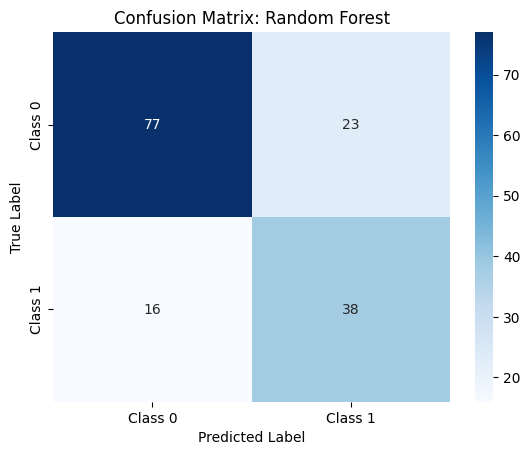

In [18]:
# print metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
conf_matrix(y_test, y_pred)

In [19]:
# path to save model
model_path = os.path.join(os.getcwd(), '..', '..', 'models', 'ml')

# create model directory if it doesn't exist
os.makedirs(model_path, exist_ok=True)

# create model file
model_file = os.path.join(model_path, 'random_forest.joblib')

# save model
dump(random_forest, model_file)
print(f'Model saved to {model_file}')

Model saved to /home/barra-white/college/qml-explainability-by-parts/training/ml/../../models/ml/random_forest.joblib
